In [485]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

In [486]:
Point = Tuple[float, float]
Line = Tuple[Point, Point]

In [487]:
def draw_line(image: np.ndarray, line: Line, color: Tuple[int, int, int] = (255, 0, 0), thickness=1):
    p1 = line[0]
    p2 = line[1]

    p1 = (
        int(p1[0]),
        int(p1[1]),
    )
    p2 = (
        int(p2[0]),
        int(p2[1]),
    )

    cv2.line(
        image,
        p1,
        p2,
        color=color,
        thickness=thickness
    )
    

def draw_lines(lines: List[Line], image_coords=True, thickness=1):
    xs = []
    ys = []
    for line in lines:
        xs.append(line[0][0])
        xs.append(line[1][0])
        ys.append(line[0][1])
        ys.append(line[1][1])

    min_x = min(xs)
    min_y = min(ys)
    max_x = max(xs)
    max_y = max(ys)
    
    padding = min(min_x, min_y)
    if padding > 0:
        padding = 0
    else:
        padding = abs(padding)
        lines = list(map(
            lambda line: ((line[0][0] + padding, line[0][1] + padding), (line[1][0] + padding, line[1][1] + padding)),
            lines
        ))
    print(f'Padding: {padding}')

    if not image_coords:
        lines = list(map(
            lambda line: ((line[0][0], max_y + 2*padding - line[0][1]), (line[1][0], max_y + 2*padding - line[1][1])),
            lines
        ))
    
    max_side = max(abs(max_x), abs(max_y))

    image = np.zeros((max_side + 2 * padding, max_side + 2 * padding, 3), dtype=np.uint8)
    height, width, _ = image.shape
    print(f'{width}x{height}')
    
    draw_line(
        image,
        ((0, height - padding), (width, height - padding)),
        (255, 255, 255),
        1
    )
    draw_line(
        image,
        ((padding, 0), (padding, height-1)),
        (255, 255, 255),
        1
    )

    for line in lines:
        line = (
            (line[0][0], line[0][1]),
            (line[1][0], line[1][1]),
        )

        draw_line(image, line, (255, 0, 0), thickness=thickness)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)

Padding: 40
150x150


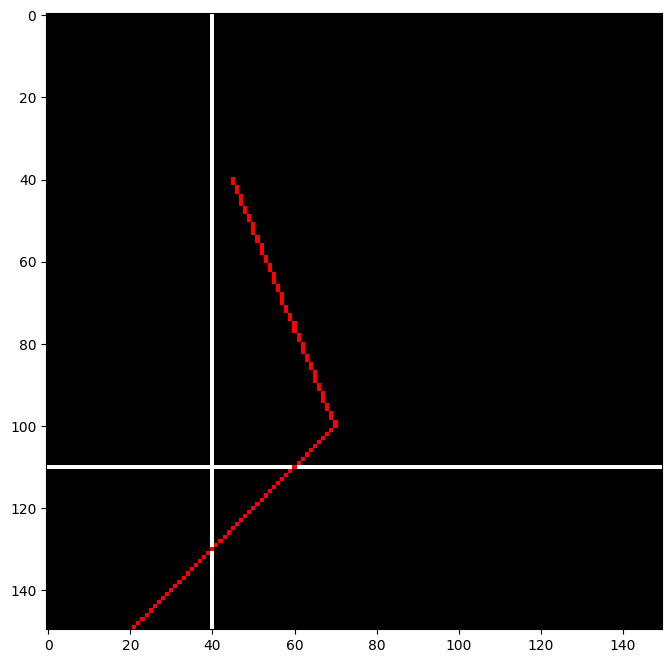

In [488]:
lines = [
    ((-20, -40), (30, 10)),
    ((5, 70), (30, 10))
]

draw_lines(lines, image_coords=False, thickness=1)

In [489]:
np.arctan(np.tan(1))

1.0

(199, -82)
Padding: 82
364x364


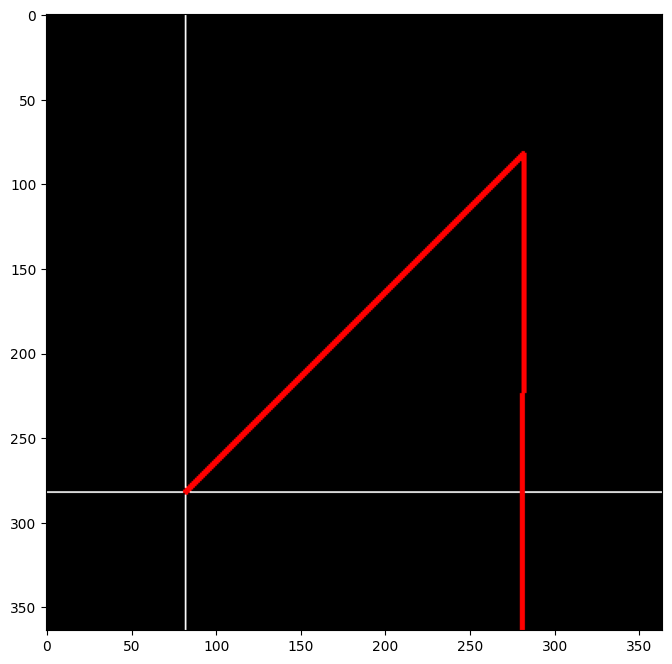

In [490]:
def rotate_poin_around_origin(point, origin, degrees):
    radians = np.deg2rad(degrees)
    x,y = point
    offset_x, offset_y = origin
    adjusted_x = (x - offset_x)
    adjusted_y = (y - offset_y)
    cos_rad = np.cos(radians)
    sin_rad = np.sin(radians)
    qx = offset_x + cos_rad * adjusted_x + sin_rad * adjusted_y
    qy = offset_y + -sin_rad * adjusted_x + cos_rad * adjusted_y
    return (int(qx), int(qy))

p_c = (200, 200)
p_1 = (0, 0)

angle_deg = -45

p_2 = rotate_poin_around_origin(p_1, p_c, angle_deg)

print(p_2)

lines = [
    (p_c, p_1),
    (p_c, p_2)
]

draw_lines(lines, image_coords=False, thickness=2)

In [491]:
np.pi

3.141592653589793

In [492]:
def compute_line_slope_intercept(line):
    if line[0][0] == line[1][0]:
        padding = 0.00001
    else:
        padding = 0.

    m, b = np.polyfit(
        [line[0][0], line[1][0] + padding],
        [line[0][1], line[1][1]],
        1
    )

    return m, b

In [493]:
def compute_line_y_at_x(m, b, x):
    return m * x + b

theta1: 1.2924966677897851 (74.05460409907714)
theta2: 0.7483780475235182 (42.87890360333854)

Padding: 257
1028x1028


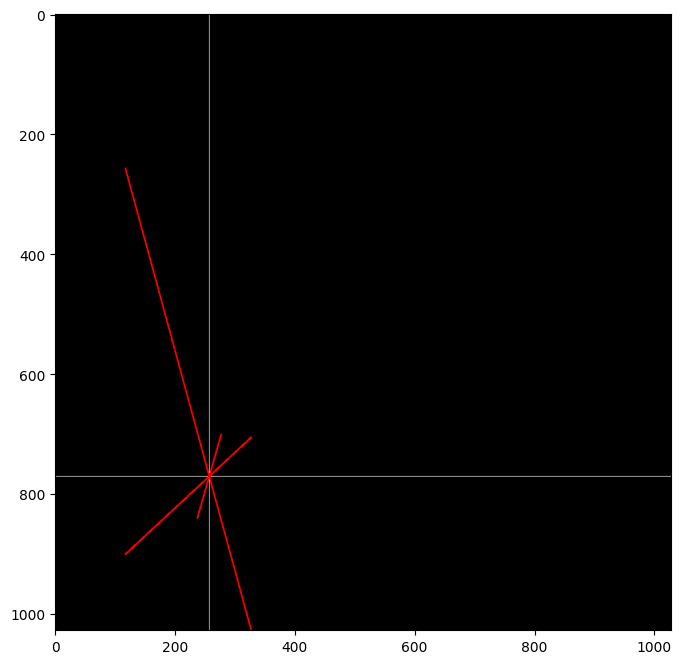

In [494]:
line1 = (
    (-2, -7),
    (2, 7)
)
line2 = (
    (-14, -13),
    (14 / 2, 13 / 2)
)

m1, b1 = compute_line_slope_intercept(line1)
m2, b2 = compute_line_slope_intercept(line2)

# m = tan(theta)
theta1 = np.arctan(m1)
print(f'theta1: {theta1} ({np.rad2deg(theta1)})')
theta2 = np.arctan(m2)
print(f'theta2: {theta2} ({np.rad2deg(theta2)})')

theta4 = theta1 - theta2
# theta_t = 

theta_t = 2*theta1 - theta2
m_t = np.tan(theta_t)
# m_t = np.tan(-theta2)
print()

x1 = 14 / 2
y1 = compute_line_y_at_x(m_t, b2, x1)
x2 = -14
y2 = compute_line_y_at_x(m_t, b2, x2)


lines_raw = [
    line1,
    line2,
    ((x1, y1), (x2, y2))
]
scale = 10

lines = []
for (p1_x, p1_y), (p2_x, p2_y) in lines_raw:
    lines.append((
        (int(p1_x * scale), int(p1_y * scale)),
        (int(p2_x * scale), int(p2_y * scale))
    ))

draw_lines(lines, thickness=2, image_coords=False)